In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df = pd.DataFrame(np.arange(0,20).reshape(5,4),index = ['Row1','Row2','Row3','Row4','Row5'],columns=['column1','column2','column3','column4'])

In [24]:
df

,column1,column2,column3,column4
Row1,0,1,2,3
Row2,4,5,6,7
Row3,8,9,10,11
Row4,12,13,14,15
Row5,16,17,18,19


In [26]:
df['column2'].unique()


array([ 1,  5,  9, 13, 17])

In [27]:
df1=pd.read_csv("train.csv")

In [30]:
df1.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
df1['Age'].fillna(df1['Age'].median(),inplace=True)

In [39]:
df1['Embarked']= np.where(df1['Embarked'].isnull(),df1['Embarked'].mode(),df1['Embarked'])

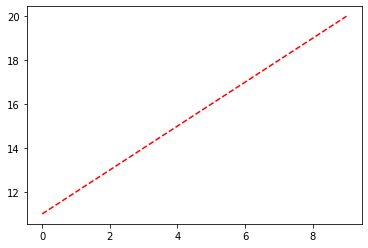

In [46]:
x= np.arange(0,10)
y= np.arange(11,21)
plt.plot(x,y,'r',linestyle='dashed')
plt.show()

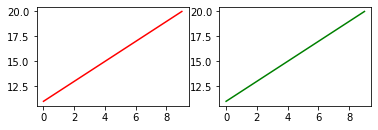

In [48]:
plt.subplot(2,2,1)
plt.plot(x,y,'r')
plt.subplot(2,2,2)
plt.plot(x,y,'g')
plt.show()

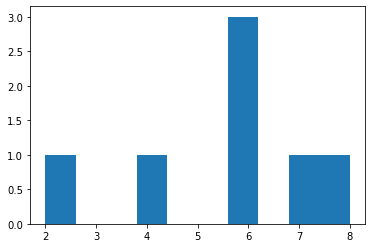

In [50]:
plt.hist([2,4,6,6,6,7,8])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x267c7c8f760>,
 'caps': [<matplotlib.lines.Line2D at 0x267c7c98640>,
 'boxes': [<matplotlib.patches.PathPatch at 0x267c7c8f7f0>,
 'medians': [<matplotlib.lines.Line2D at 0x267c7c986a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x267c7c9dfd0>,
 'means': []}

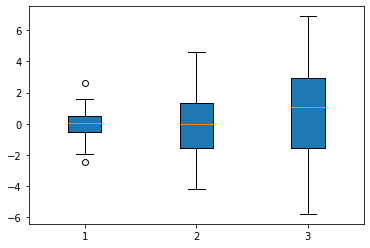

In [51]:
data =[np.random.normal(0,std,100) for std in range(1,4)]
plt.boxplot(data,vert=True,patch_artist = True)

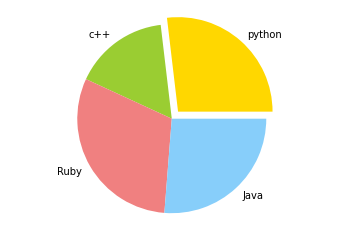

In [57]:
labels= ['python','c++','Ruby','Java']
sizes =[215,130,245,210]
colors = ['gold','yellowgreen','lightcoral','lightskyblue']
explode = (0.1,0,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors)
plt.axis("equal")
plt.show()

<AxesSubplot:>

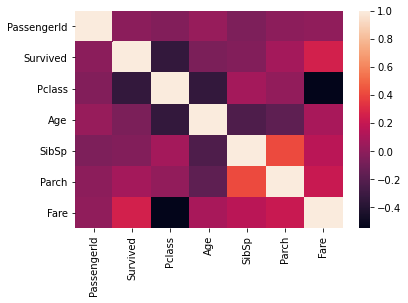

In [67]:
df1.corr()
sns.heatmap(df1.corr())

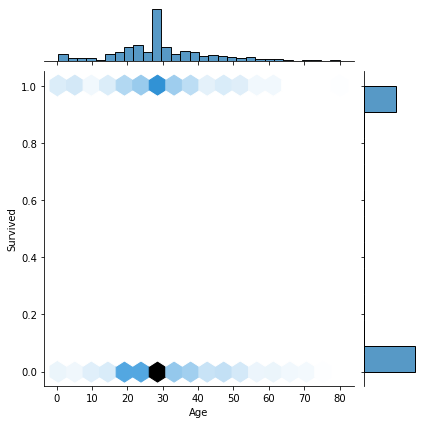

In [68]:
sns.jointplot(x='Age',y='Survived',data = df1,kind = 'hex')

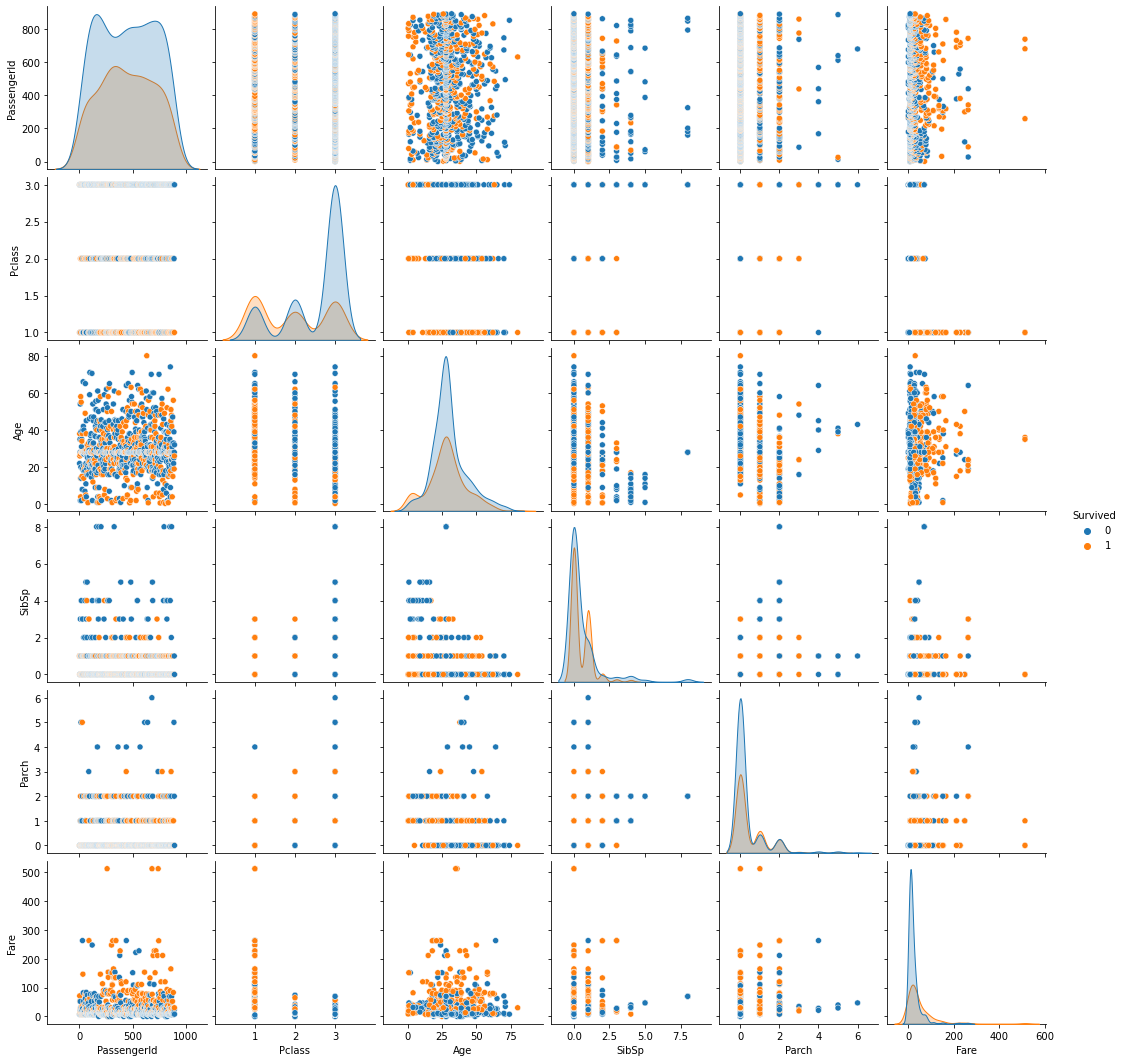

In [70]:
sns.pairplot(df1,hue='Survived')

C:\Users\Supriya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

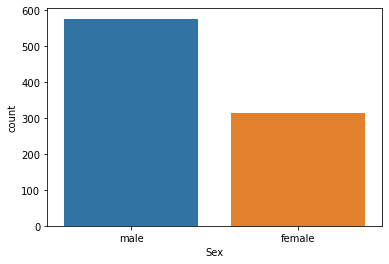

In [72]:
sns.countplot('Sex',data =df1)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

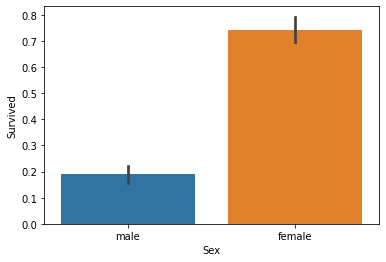

In [73]:
sns.barplot(x='Sex',y='Survived',data = df1)

<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

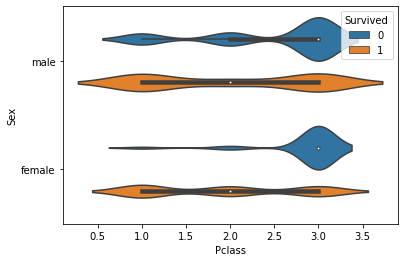

In [78]:
sns.violinplot(y="Sex",x="Pclass",hue="Survived",data = df1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

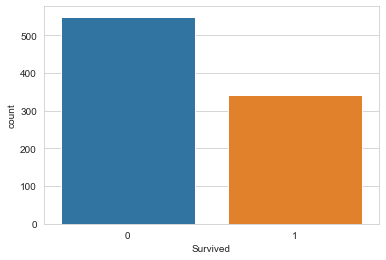

In [79]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data = df1)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

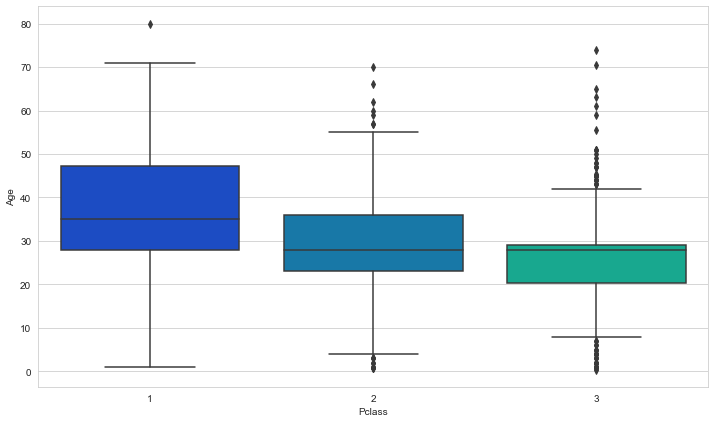

In [80]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=df1,palette ="winter" )

In [82]:
df1.drop('Cabin',axis=1,inplace=True)

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [86]:
sex= pd.get_dummies(df1['Sex'],drop_first=True)
embarked= pd.get_dummies(df1['Embarked'],drop_first=True)

In [91]:
df1.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [92]:
df1= pd.concat([df1,sex,embarked],axis=1)

In [89]:
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,28.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [96]:
df1.drop(['PassengerId'],axis=1,inplace =True)

In [97]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,1,0,0


In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1.drop(['Survived'],axis=1),df1['Survived'])

In [99]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)

C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [105]:
from sklearn.metrics import confusion_matrix ,accuracy_score
cof = confusion_matrix(y_test,y_pred)
acc= accuracy_score(y_test)

In [106]:
acc

array([[125,  13],
       [ 29,  56]], dtype=int64)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
dataset.Embarked.fillna("M",inplace = True)

In [8]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
M      2
Name: Embarked, dtype: int64

In [9]:
top_values=[x for x in dataset.Embarked.value_counts().index]

In [11]:
for label in top_values:
    dataset[label] = np.where(dataset['Embarked']==label,1,0)

In [12]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,C,Q,M
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,0,0
